# 1. Setup and Load Data

## 1.1 Install Dependecies and Setup

In [6]:
%pip install filetype

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tensorflow opencv-python matplotlib

In [8]:
%pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               3.0.0
astunparse              1.6.3
certifi                 2024.12.14
charset-normalizer      3.4.1
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.6.7
decorator               5.1.1
exceptiongroup          1.2.2
executing               2.1.0
filetype                1.2.0
flatbuffers             24.12.23
fonttools               4.55.3
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.68.1
h5py                    3.12.1
idna                    3.10
importlib_metadata      8.5.0
ipykernel               6.29.5
ipython                 8.31.0
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.7.0
kiwisolver              1.4.8
libclang                18.1.1
Markdown         

In [9]:
import tensorflow as tf
import os

In [10]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.1 Remove Dodgy Images

In [11]:
import cv2
import filetype

In [12]:
data_dir = "data"

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = filetype.guess(image_path)
            if tip.extension not in image_exts:
                print(f'Image "{image_path}" not in Extension List')
                os.remove(image_path)
                print(f'Image "{image_path}" Deleted!!')
        except Exception as e:
            print(f'Issue with image "{image_path}"')

## 1.3 Load Data

In [15]:
# ?? function shows the documentation for tf.data.dataset library
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Documentation for image_dataset_from directory, show things like batch size, image size, etc.
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [18]:
# Converting images from data directory into datasets
data= tf.keras.utils.image_dataset_from_directory('data')

Found 1564 files belonging to 5 classes.


In [19]:
# To iterate through data as data[0] wont work
data_iterator = data.as_numpy_iterator()

In [20]:
# Get another batch
batch = data_iterator.next()

In [21]:
# Images in batch[0]
# Labels in batch[1]
# Images Represented as Numpy Array
# (32,256,256) means batch size of 32 and image size of (256,256)
batch[0].shape

(32, 256, 256, 3)

In [22]:
# Shows the label values attached to particular pic in specific batch, for ex- array([4,2,4,4]) means pics have label no. 4,2,4,4 respectively
batch[1]

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 0, 2, 0, 4, 4, 2, 4, 2, 2,
       2, 3, 2, 4, 1, 2, 2, 2, 2, 2], dtype=int32)

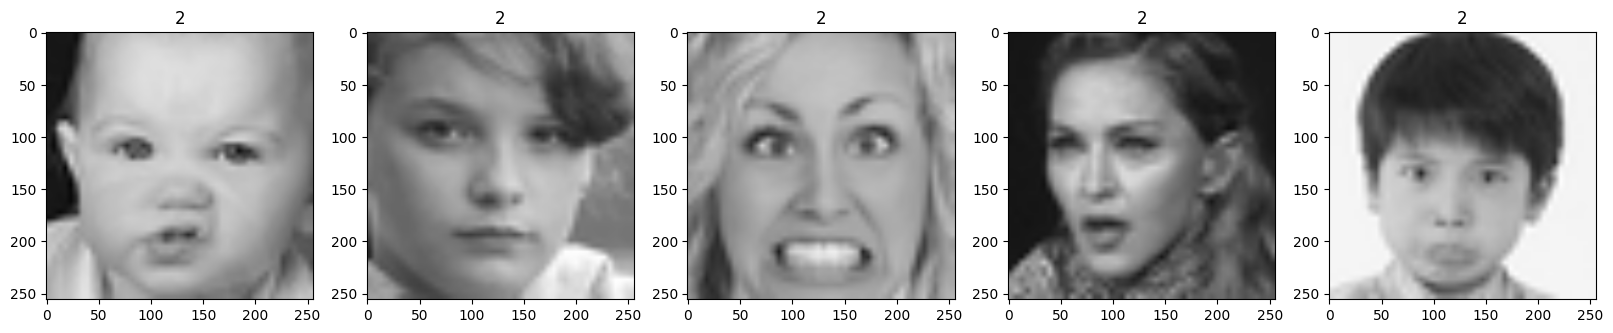

In [23]:
# Plot first 5 images from a batch on a graph with respective labels(1,2,3,4)
# Run "Get Another Batch" to view more example
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [24]:
# This function helps us to scale data within the data pipeline so we dont need scale batches individually
# x represent images, y represent labels
data = data.map(lambda x,y: (x/255, y))

In [25]:
# Get Another Batch
batch = data.as_numpy_iterator().next()

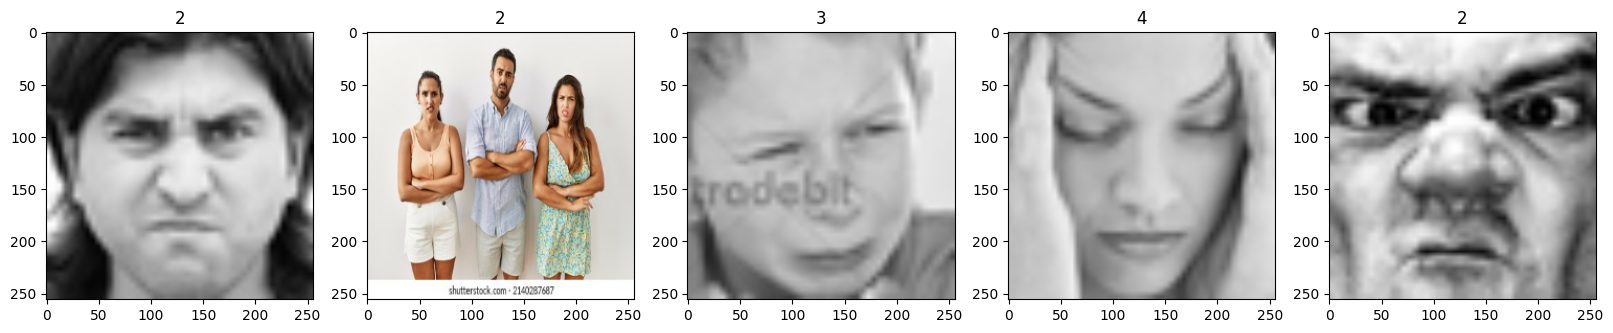

In [26]:
# Potential Error: img.astype(int) will give black image as scaled data is between 0 and 1 and int datatype will floor round anything less than 1.
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [27]:
# No of batches in Data
len(data)

49

In [28]:
# 70% images assigned to training data
# 20% images assigned to Validating data
# 10% images assigned to testing data
train_size = int(len(data) *.7)
val_size = int(len(data) *.2)+1
test_size = int(len(data) *.1)+1

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Learning Model

## 3.1 Building Deep Learning Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

C:\Users\manjo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,621 (56.61 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)